In [31]:
import pandas as pd

# Load the Excel file
file_path = "Data.xlsx"  # Ensure the file is in the same folder as your notebook
data = pd.read_excel( r"C:\Users\Fady Kaisar\Desktop\New folder (2)\capstone\Capstone G12\ML\Recipe_and_Properties_of_Leathers\Data.xlsx")

# Display the first few rows
data.head()


,Soaking_pH,Shrinkge_Temperature_Ts,time,CH3COOH,Tensile_strength (kg/cm2)
0,7.5,110.0,155.37037,0.75,238.0
1,7.5,101.0,155.37037,0.75,278.0
2,7.5,79.0,155.37037,0.75,224.0
3,7.5,98.0,155.37037,0.75,231.0
4,8.0,102.0,155.37037,0.75,298.0


In [32]:
data.isnull().sum()


Soaking_pH                   0
Shrinkge_Temperature_Ts      0
time                         0
CH3COOH                      0
Tensile_strength (kg/cm2)    0
dtype: int64

In [33]:
data.describe()


,Soaking_pH,Shrinkge_Temperature_Ts,time,CH3COOH,Tensile_strength (kg/cm2)
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,9.468073,94.797459,155.712596,0.632748,264.192786
std,9.264178,13.510391,49.463032,0.180228,51.705320
min,7.166003,67.917841,79.738011,0.157983,126.253354
25%,7.648775,81.984242,155.241829,0.499747,230.952980
50%,8.500000,99.776234,155.370370,0.668692,269.994446
75%,9.243307,104.949549,155.481200,0.752388,297.997495
max,93.224717,126.117580,530.100511,0.996837,364.696172


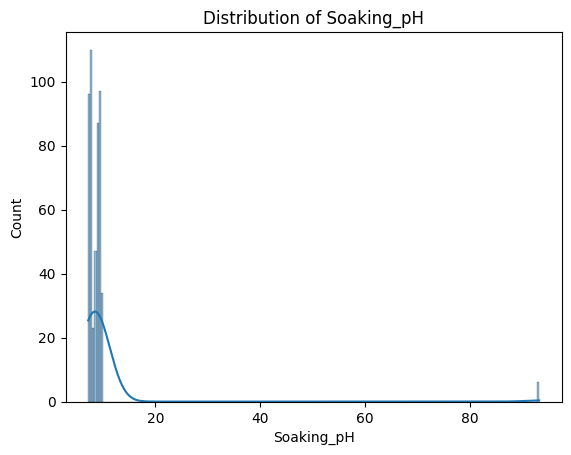

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution plots
sns.histplot(data['Soaking_pH'], kde=True)
plt.title("Distribution of Soaking_pH")
plt.show()



In [35]:
data = data[(data['Soaking_pH'] <= 14) & (data['time'] <= 300)]

from sklearn.model_selection import train_test_split

X = data[['Soaking_pH', 'Shrinkge_Temperature_Ts', 'time']]
y = data['CH3COOH']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [36]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [37]:
y_pred = model.predict(X_test)


In [38]:
from sklearn.metrics import mean_squared_error, r2_score

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))


Mean Squared Error: 0.027474015187656662
R-squared Score: 0.0345988993398163


In [39]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results.to_excel("Predictions.xlsx", index=False)
